$$**Classification-Project**$$

$Buisness - Objective$
#### We have to predict the grade of the rooms which varies between "A" grade to "E" grade . Where A grade is the best and E is the worst . 

> **As we have the target variable as categorical values so we need to use classification models insted of regression .**

## Importing the required libraries

In [106]:
# general imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
 
from numpy import mean
from numpy import std

import warnings
warnings.filterwarnings("ignore")

# Sklearn (building models)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

##### Uploading the file to google colab

In [2]:
# uploading the data
from google.colab import files
upload = files.upload()

Saving Project2_Classification_HouseGrade_Data_Project.csv to Project2_Classification_HouseGrade_Data_Project.csv


Read the data

In [47]:
import io
# raead the data
house_df = pd.read_csv(io.BytesIO(upload['Project2_Classification_HouseGrade_Data_Project.csv']))

In [48]:
# first 2 rows
house_df.head(2)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D


In [49]:
# last 2 rows
house_df.tail(2)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B
2999,3000,343,7,6,6,8,NO,0,108,5,95,3,4105,C


In [50]:
# shape of the data
house_df.shape

(3000, 14)

In [51]:
# information about the data

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [52]:
# column names
house_df.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [53]:
# describe the numerical columns
house_df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [54]:
# describe the non-numerical columns

house_df.describe(include="object").T

,count,unique,top,freq
roof,3000,2,YES,1543
Grade,3000,5,D,1270


In [55]:
# checking for missing values

house_df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [56]:
# Removing unwanted columns
house_df.drop("Id",axis=1,inplace=True)

In [57]:
# checking for duplicate rows 

house_df.duplicated().sum() # no duplicate rows are present in the data

0

#### Data visualization (uni_variate)

In [58]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(8, 8), kde=False, bins=None) :

    f2, (ax_box2, ax_hist2)= plt.subplots(
        nrows=2,sharex=True, gridspec_kw={"height_ratios": (4.95, 8.95)}, 
                    figsize = figsize,)

    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color="g")
    
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"  
    )if bins else sns.histplot( 
        data=data, x=feature, kde=kde, ax=ax_hist2) 
    ax_hist2.axvline(data[feature].mean(), color="b", linestyle="-")
    ax_hist2.axvline( data[feature].median(), color="red", linestyle="-")
     # Adding median line in the hist plot

Histogram and box plot for numerical values

<Figure size 432x288 with 0 Axes>

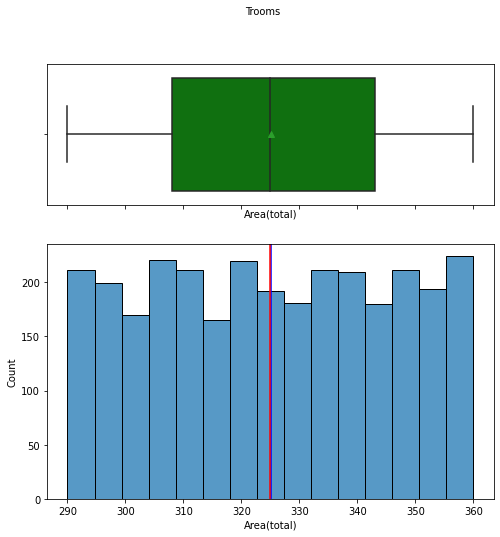

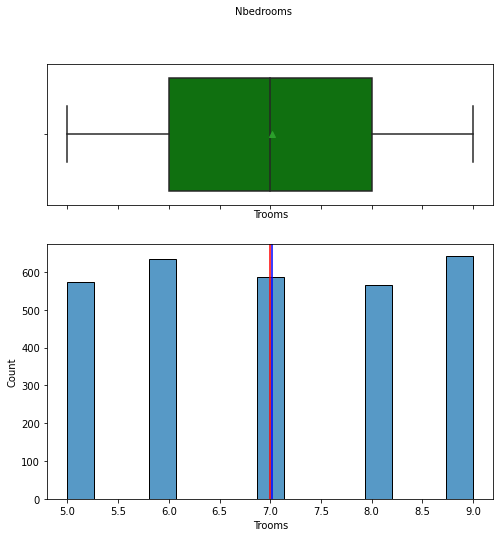

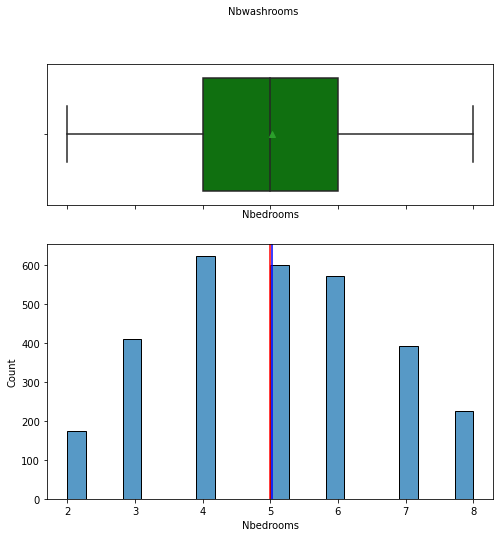

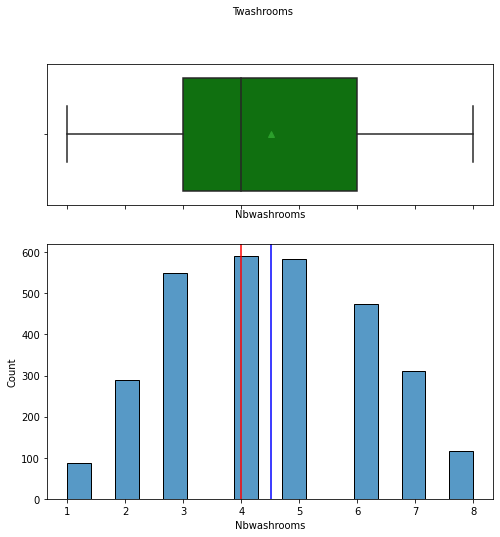

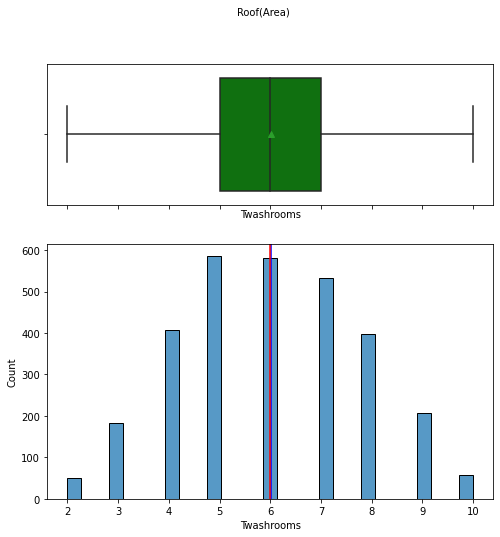

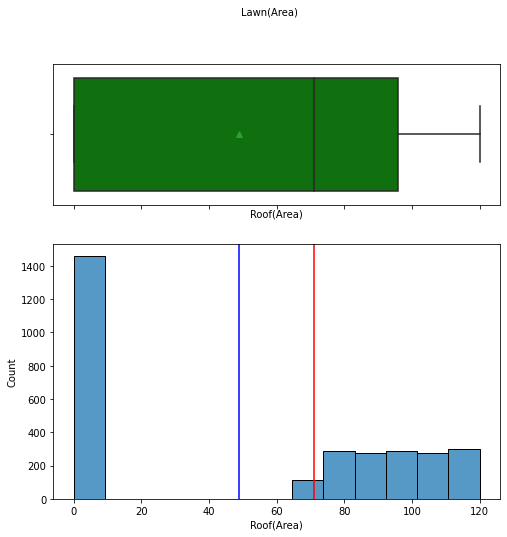

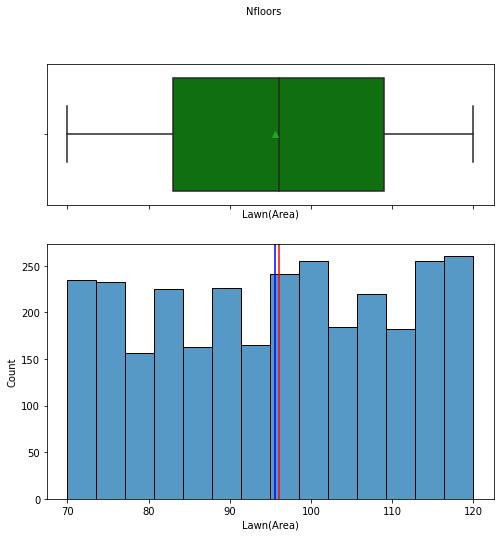

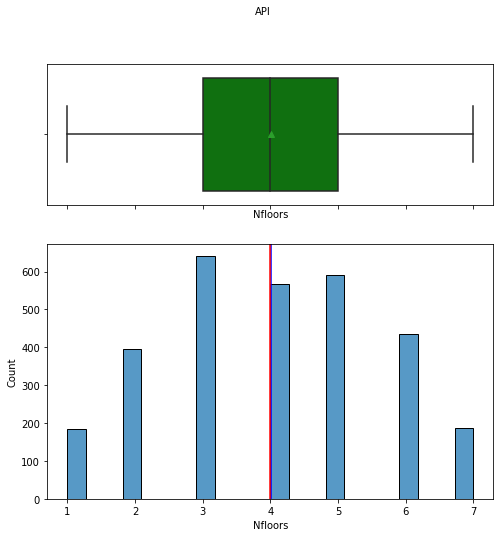

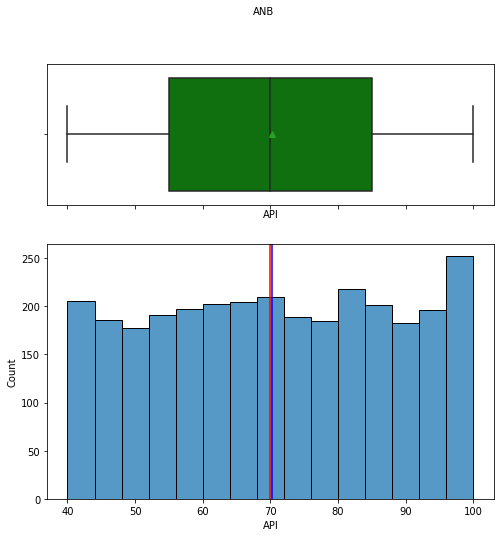

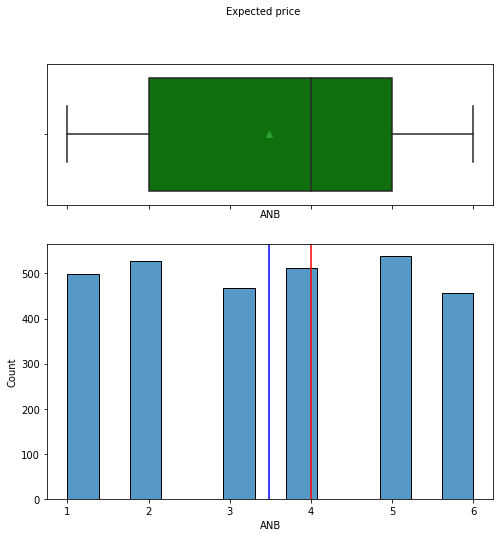

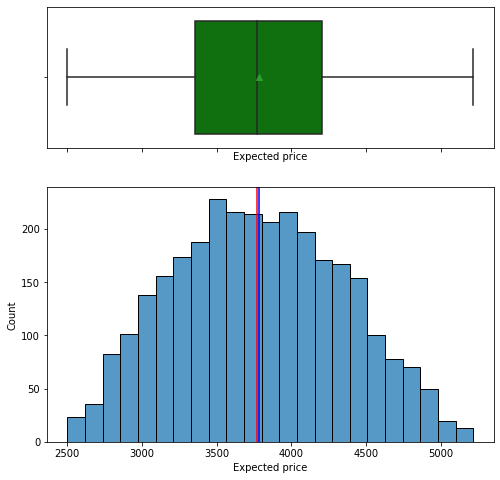

In [59]:
# Creating box plot and histogram for age column blue line represents  mean and redline repredents the median
numeric_col= house_df.select_dtypes("number").columns
for i in numeric_col:
  plt.suptitle(i,size = 10)
  histogram_boxplot(house_df,i)

**There are no outliers in the data**

In [63]:
# categorical columns
cat_col= house_df.select_dtypes("object").columns
cat_col

Index(['roof', 'Grade'], dtype='object')

In [64]:
# function for bar plots for catagorical columns
def bar(df,i):
  plt.suptitle(i,size = 20)
  g = df[i].value_counts()
  h=pd.DataFrame({"ind":g.index,"value":g.values})
  plt.barh(h["ind"].values,h["value"].values)
  plt.show()

In [65]:
# piechart for categorical features

def pie(df,col):
  stats = df[col].value_counts()
  values = list(stats)
  names = list(map(lambda x : ''.join((str(x))),list(stats.index)))
  plt.pie(values,labels=names,autopct="%0.2f%%")
  plt.title(col)
  plt.show()

Bar plots for catagorical columns

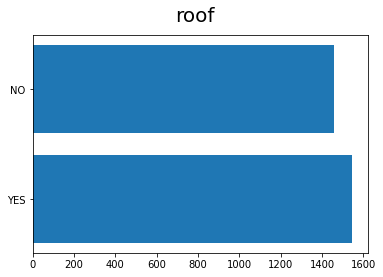

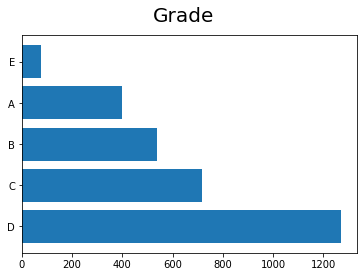

In [66]:
# barplots for all categorical columns

for i in cat_col:
  bar(house_df,i)

Pie charts for catagorical columns

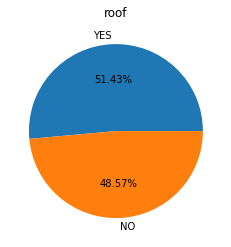

In [67]:
# piechart of all categorical feature(roof)
pie(house_df,"roof")

##### Number of house that has roofs is approximately 51% .
##### Number of house that does not have any roofs is approximately 49% .

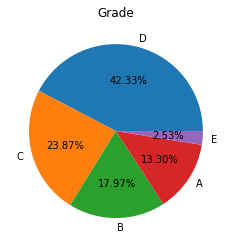

In [68]:
# piechart of all categorical feature(grade)
pie(house_df,"Grade") 

#### Number of A grade of the house is  approximately 13% .
#### Number of B grade of the house is  approximately 18% .
#### Number of C grade of the house is  approximately 24% .
#### Number of D grade of the house is  approximately 42% .
#### Number of E grade of the house is  approximately 3%  .

### Data visualization (Bi-variate)

In [69]:
# box plot
def visual_box(a,b,c):   # (a="other column" , b= "main column name",c="dataframe name")
    sns.boxplot(y = c[b], x = c[a])
    plt.show()

Relationship between sales and Item_Identifier

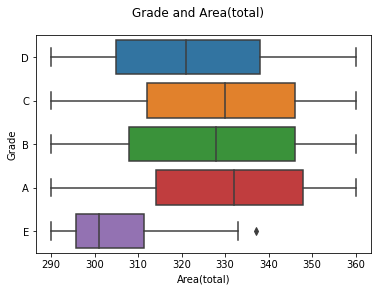

********************************************************************************


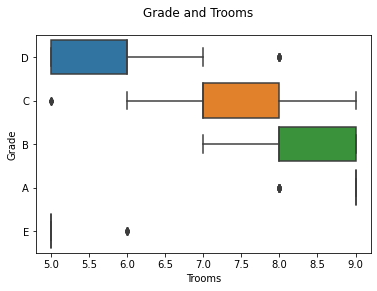

********************************************************************************


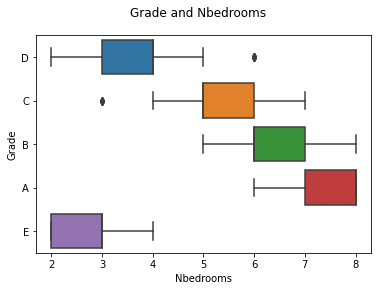

********************************************************************************


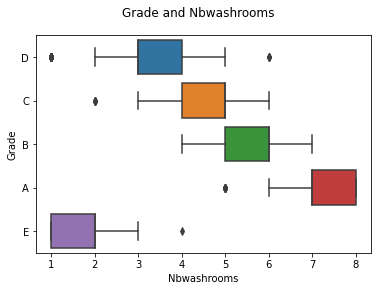

********************************************************************************


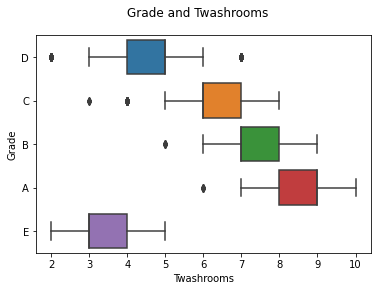

********************************************************************************


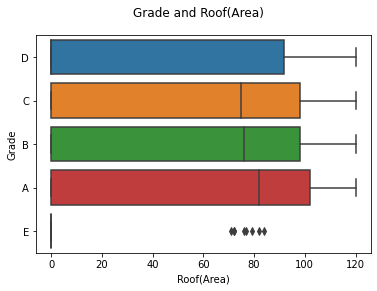

********************************************************************************


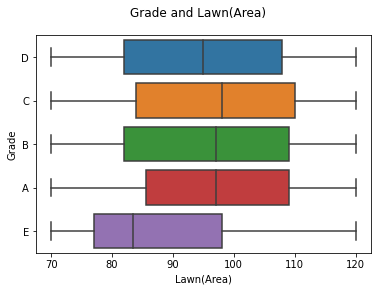

********************************************************************************


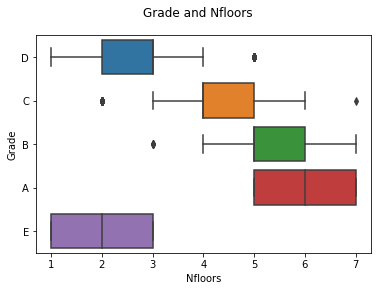

********************************************************************************


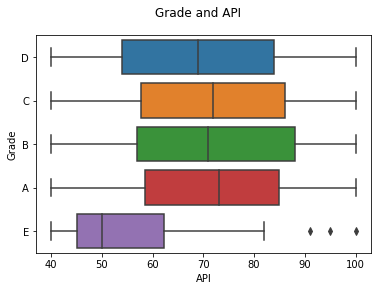

********************************************************************************


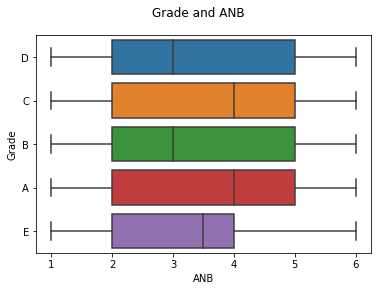

********************************************************************************


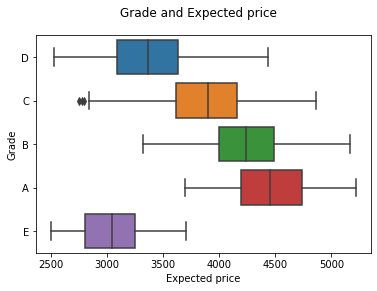

********************************************************************************


In [73]:
for i in numeric_col:
  plt.suptitle("Grade and "+str(i))
  visual_box(i,"Grade",house_df)
  print(80*"*")

#### E grade grade has lowest and A grade has the highest numbers Area(Total).
#### E grade grade has lowest and A grade has the highest(but lowest spread)  numbers Trooms.
#### E grade grade has lowest and A grade has the highest numbers Nbedrooms.
#### E grade grade has lowest and A grade has the highest numbers Nbwashrooms.
#### E grade grade has lowest and A grade has the highest numbers Twashrooms.
#### E grade grade has lowest and C grade has the highest average Lawn(area).
#### E grade grade has lowest and A grade has the highest average Nfloors.
#### E grade grade has lowest and A grade has the highest average API.
#### B grade , D grade has lowest  and A , C grade has the highest average ANB.
#### "E" Grade has low and "A" grade has highest Expected price followed by "B","C" and "D" Grade.

In [74]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# encoding the purpose variable

for i in cat_col:
  if type(house_df[i]=="object"):
    house_df[i]=label_encoder.fit_transform(house_df[i])

In [76]:
# first two rows

house_df.head(2)

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,358,5,4,3,4,1,71,96,3,72,4,3510,3


In [75]:
# corelaation
corr=house_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Area(total),1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623
API,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.007983,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575,-0.099000


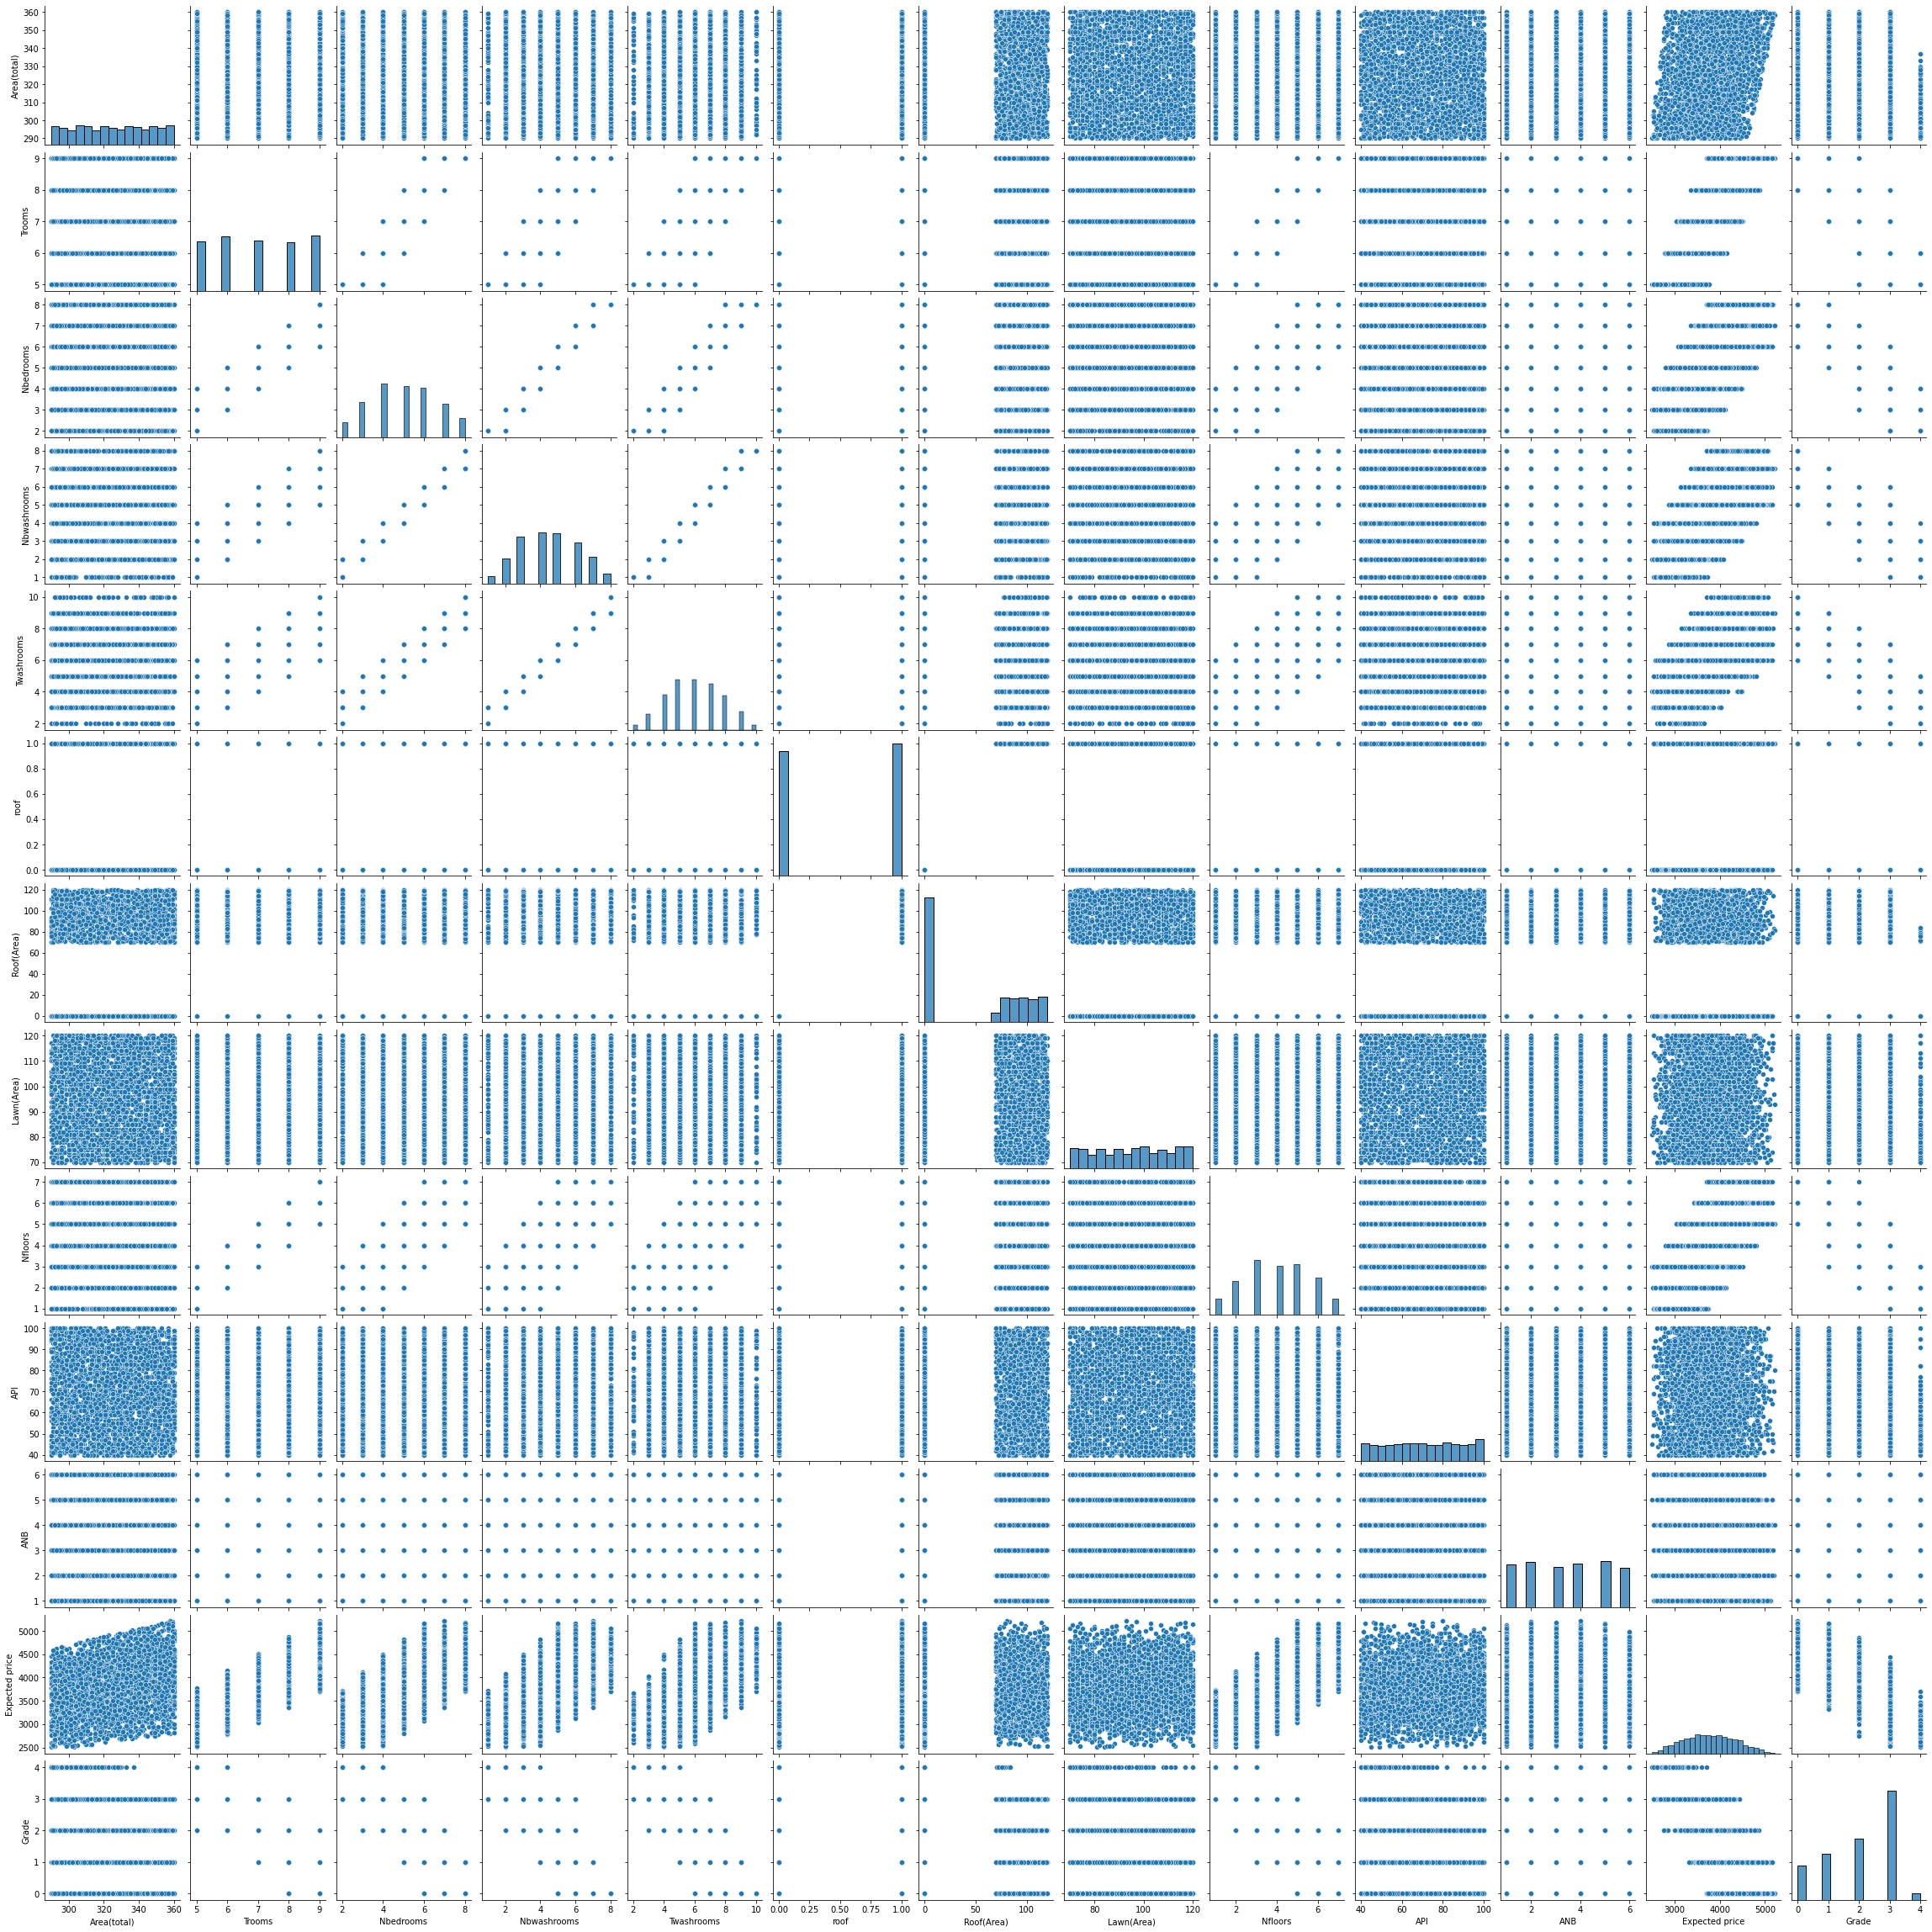

In [77]:
# creating scatterplots for all numerical collumns
sns.pairplot(house_df,palette="Dark2")
plt.show()

>Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors and Expected price has strong negetive correlation with Grade.

#### Creating dataframe with required columns

In [78]:
new_df = house_df.loc[:,["Trooms","Nbedrooms","Nbwashrooms",
                      "Twashrooms","Nfloors", "Expected price","Grade"]]
new_df.head()

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,Grade
0,6,5,4,6,2,3481,3
1,5,4,3,4,3,3510,3
2,7,5,4,5,5,3748,2
3,6,4,3,5,2,3134,3
4,7,4,4,5,3,3843,3


 ### Split the data

In [87]:
# split the data into train and test (from the main data to get y values)

index = int(len(new_df)*.8) # 80 - 20 split

train_df1 = new_df.iloc[:index] 

test_df1 = new_df.iloc[index:] 

y_train = train_df1[["Grade"]]
y_test = test_df1[["Grade"]] 
print("train= {}, test = {}".format(len(y_train), len(y_test)))

train= 2400, test = 600


In [81]:

# scaling the data

from sklearn.preprocessing import MinMaxScaler

# Standardrizing data

scaler = MinMaxScaler()
data_scaled =pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)

In [83]:
# scaled data
data_scaled.head(2)

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,Grade
0,0.25,0.500000,0.428571,0.50,0.166667,0.360251,0.75
1,0.00,0.333333,0.285714,0.25,0.333333,0.370944,0.75


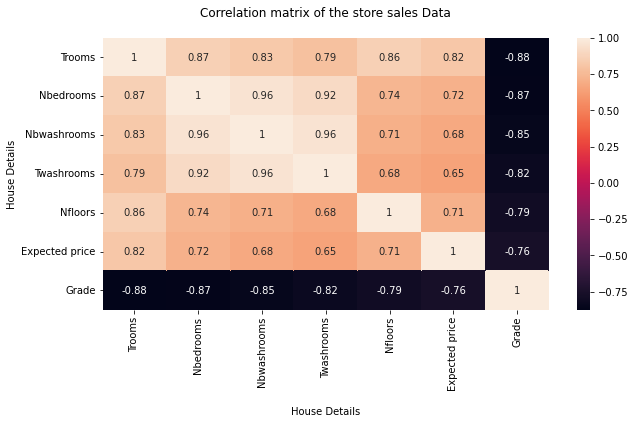

In [86]:
# Correlation Heatmap
plt.figure(figsize= (10,5))
hm = sns.heatmap(data_scaled.corr(), annot = True)
hm.set(xlabel='\nHouse Details', ylabel='House Details', title = "Correlation matrix of the store sales Data\n")
plt.show()

In [88]:
# split the data into train and test (from the scaled data)

index = int(len(data_scaled)*.8) # 80 - 20 split

train_df = data_scaled.iloc[:index] 

test_df = data_scaled.iloc[index:] 

print("train= {}, test = {}".format(len(train_df), len(test_df)))

train= 2400, test = 600


In [89]:
# X values (train and test)
X_train=train_df.drop(columns=["Grade"],axis=1)
X_test=test_df.drop(columns=["Grade"],axis=1)

### Model building

In [90]:
# creating DataFrame
Model = pd.DataFrame()

##### Logistic Regression

In [220]:
# creating regression model

m1=LogisticRegression()
Logistic_r = m1.fit(X_train,y_train)

In [92]:
# predection

model1_predict_test_y = Logistic_r.predict(X_test)

In [93]:
Model["Predicted_Logistic.R"] = model1_predict_test_y
Model.head()

,Predicted_Logistic.R
0,0
1,3
2,3
3,2
4,3


In [99]:

print(classification_report(y_test,model1_predict_test_y))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        84
           1       0.72      0.85      0.78        98
           2       0.79      0.64      0.71       147
           3       0.83      0.93      0.88       258
           4       0.00      0.00      0.00        13

    accuracy                           0.81       600
   macro avg       0.65      0.65      0.64       600
weighted avg       0.79      0.81      0.80       600



In [169]:
# accuracy_score,recall_score,f1_score and precision_score (logistic model)

a1 = accuracy_score(y_test, model1_predict_test_y)
b1 = recall_score(y_test, model1_predict_test_y, average='weighted')
c1 = f1_score(y_test, model1_predict_test_y, average='weighted')
d1 = precision_score(y_test, model1_predict_test_y, average='weighted')

print('accuracy for logistic R model = ', a1)
print('recall for logistic R model = ', b1)
print('f1-score for logistic R model = ', c1)
print('precision for logistic R model = ', d1)

accuracy for logistic R model =  0.8083333333333333
recall for logistic R model =  0.8083333333333333
f1-score for logistic R model =  0.7961866098467306
precision for logistic R model =  0.7927538113569331


##### Accuracy for logistic R model 80.8%
##### Recall for logistic R model 80.8%
##### f1-score for logistic R model 79.61%
##### Precision for logistic R model 79.27%

AUC

In [239]:
### AUC-Logistic Regression
auc1 = cross_val_score(Logistic_r, X_train, y_train, scoring='roc_auc_ovr', cv=2).mean()
print("AUC value in Logistic regression is =",auc1)

AUC value in Logistic regression is = 0.9497323328805878


[[ 68  16   0   0   0]
 [  8  83   7   0   0]
 [  0  17  94  36   0]
 [  0   0  18 240   0]
 [  0   0   0  13   0]]


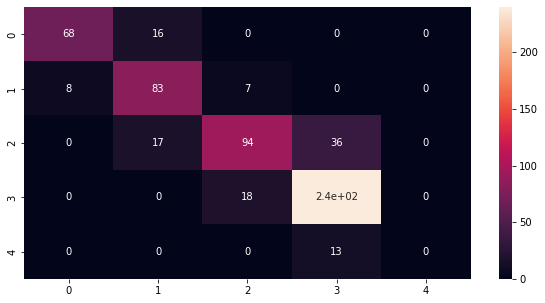

In [164]:
from sklearn.metrics import confusion_matrix

# confusion matrix
conf_matrix= confusion_matrix(y_test,model1_predict_test_y)
print(conf_matrix)

# plot
plt.subplots(figsize=(10,5))
sns.heatmap(conf_matrix,annot=True)
plt.show()

##### Bagging With Random Forest

In [165]:
# define the model
m2 = RandomForestClassifier()

Random_f = m2.fit(X_train,y_train)

In [166]:
# predection

model2_predict_test_y = Random_f.predict(X_test)

In [167]:
print(classification_report(y_test,model2_predict_test_y))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86        84
           1       0.73      0.79      0.75        98
           2       0.69      0.63      0.66       147
           3       0.82      0.84      0.83       258
           4       0.18      0.15      0.17        13

    accuracy                           0.77       600
   macro avg       0.66      0.65      0.66       600
weighted avg       0.77      0.77      0.77       600



In [168]:
Model["Predicted_Random.Forest"] = model2_predict_test_y
Model.head()

,Predicted_Logistic.R,Predicted_Random.Forest
0,0,0
1,3,3
2,3,4
3,2,2
4,3,3


In [170]:
# accuracy_score,recall_score,f1_score and precision_score (Random Forest)

a2 = accuracy_score(y_test, model2_predict_test_y)
b2 = recall_score(y_test, model2_predict_test_y, average='weighted')
c2 = f1_score(y_test, model2_predict_test_y, average='weighted')
d2 = precision_score(y_test, model2_predict_test_y, average='weighted')

print('accuracy for Random Forest model = ', a2)
print('recall for Random Forest model = ', b2)
print('f1-score for Random Forest model = ', c2)
print('precision for Random Forest model = ', d2)

accuracy for Random Forest model =  0.77
recall for Random Forest model =  0.77
f1-score for Random Forest model =  0.7676964355497038
precision for Random Forest model =  0.766546602648444


##### Accuracy for Random Forest model 77%
##### Recall for Random Forest model 77%
##### f1-score for Random Forest model 76.76%
##### Precision for Random Forest model 76.65%

In [243]:
### AUC-Random Forest
auc2 = cross_val_score(Random_f, X_train, y_train, scoring='roc_auc_ovr', cv=2).mean()
print("AUC value in Random Forest is =",auc2)

AUC value in Random Forest is = 0.9274342819571189


[[ 72  11   1   0   0]
 [ 11  77  10   0   0]
 [  0  18  93  36   0]
 [  0   0  31 218   9]
 [  0   0   0  11   2]]


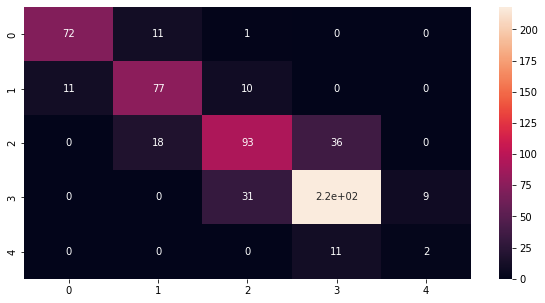

In [216]:
# confusion matrix
conf_matrix= confusion_matrix(y_test,model2_predict_test_y)
print(conf_matrix)

# plot
plt.subplots(figsize=(10,5))
sns.heatmap(conf_matrix,annot=True)
plt.show()

##### Boosting using Adaboost

In [171]:
# define the model
m3 = AdaBoostClassifier()

# evaluate the model
ada_model = m3.fit(X_train,y_train)

In [172]:
# predection

model3_predict_test_y = ada_model.predict(X_test)

In [173]:
print(classification_report(y_test,model3_predict_test_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.46      0.96      0.62        98
           2       0.89      0.39      0.55       147
           3       0.73      0.71      0.72       258
           4       0.10      0.62      0.17        13

    accuracy                           0.57       600
   macro avg       0.44      0.54      0.41       600
weighted avg       0.61      0.57      0.55       600



In [174]:
Model["Predicted_Adaboost"] = model3_predict_test_y
Model.head()

,Predicted_Logistic.R,Predicted_Random.Forest,Predicted_Adaboost
0,0,0,1
1,3,3,3
2,3,4,4
3,2,2,2
4,3,3,3


In [181]:
# accuracy_score,recall_score,f1_score and precision_score (Adaboost)

a3 = accuracy_score(y_test, model3_predict_test_y)
b3 = recall_score(y_test, model3_predict_test_y, average='weighted')
c3 = f1_score(y_test, model3_predict_test_y, average='weighted')
d3 = precision_score(y_test, model3_predict_test_y, average='weighted')

print('accuracy for Adaboost model = ', a3)
print('recall for Adaboost model = ', b3)
print('f1-score for Adaboost model = ', c3)
print('precision for Adaboost model = ', d3)

accuracy for Adaboost model =  0.5716666666666667
recall for Adaboost model =  0.5716666666666667
f1-score for Adaboost model =  0.5486564055518354
precision for Adaboost model =  0.6095494652861656


##### Accuracy for Adaboost model 57%
##### Recall for Adaboost model 57%
##### f1-score for Adaboost model 54.86%
##### Precision for Adaboost model 60.95%

In [242]:
### AUC-Ada boost
auc3 = cross_val_score(ada_model, X_train, y_train, scoring='roc_auc_ovr', cv=2).mean()
print("AUC value in Random Forest is =",auc3)

AUC value in Random Forest is = 0.7198318850932074


[[  0  84   0   0   0]
 [  0  94   4   0   0]
 [  0  26  58  63   0]
 [  0   0   3 183  72]
 [  0   0   0   5   8]]


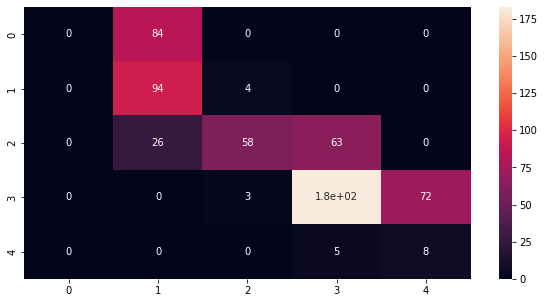

In [217]:
# confusion matrix
conf_matrix= confusion_matrix(y_test,model3_predict_test_y)
print(conf_matrix)

# plot
plt.subplots(figsize=(10,5))
sns.heatmap(conf_matrix,annot=True)
plt.show()

##### Stacking
**Evaluate the Stacking method using K-Nearest Neighbors, decision tree, SVM as base models, and logistic regression as a meta-model. Plot the comparison of all the evaluation scores .**

In [176]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svC', SVC()))
    
    # define meta learner model (meta model)
    level1 = LogisticRegression()
    
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [177]:
# define the model
m4 = get_stacking()

# evaluate the model
stack_model = m4.fit(X_train,y_train)

In [178]:
# PREDICTED VALUES OF Y
model4_predict_test_y = stack_model.predict(X_test)

In [179]:
print(classification_report(y_test,model4_predict_test_y))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        84
           1       0.70      0.81      0.75        98
           2       0.78      0.63      0.70       147
           3       0.83      0.93      0.88       258
           4       0.00      0.00      0.00        13

    accuracy                           0.80       600
   macro avg       0.63      0.64      0.63       600
weighted avg       0.78      0.80      0.79       600



In [180]:
Model["Predicted_Stacking"] = model4_predict_test_y
Model.head()

,Predicted_Logistic.R,Predicted_Random.Forest,Predicted_Adaboost,Predicted_Stacking
0,0,0,1,0
1,3,3,3,3
2,3,4,4,3
3,2,2,2,2
4,3,3,3,3


In [182]:
# accuracy_score,recall_score,f1_score and precision_score (Stacking)

a4 = accuracy_score(y_test, model4_predict_test_y)
b4 = recall_score(y_test, model4_predict_test_y, average='weighted')
c4 = f1_score(y_test, model4_predict_test_y, average='weighted')
d4 = precision_score(y_test, model4_predict_test_y, average='weighted')

print('accuracy for Stacking model = ', a4)
print('recall for Stacking model = ', b4)
print('f1-score for Stacking model = ', c4)
print('precision for Stacking model = ', d4)

accuracy for Stacking model =  0.8
recall for Stacking model =  0.8
f1-score for Stacking model =  0.7878507903366994
precision for Stacking model =  0.7830022617484051


##### Accuracy for Stacking model 80%
##### Recall for Stacking model 80%
##### f1-score for Stacking model 78.78%
##### Precision for Stacking model 78.30%

In [244]:
### AUC-Stacking
auc4 = cross_val_score(stack_model, X_train, y_train, scoring='roc_auc_ovr', cv=2).mean()
print("AUC value in Random Forest is =",auc4)

AUC value in Random Forest is = 0.9511326839845204


[[ 69  15   0   0   0]
 [ 12  79   7   0   0]
 [  0  19  93  35   0]
 [  0   0  19 239   0]
 [  0   0   0  13   0]]


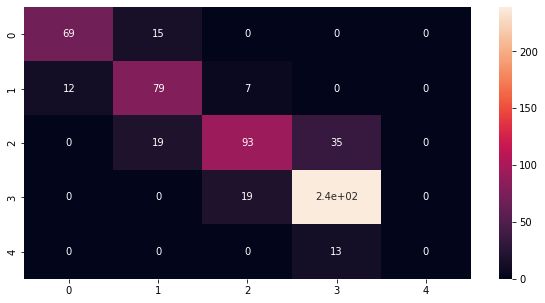

In [218]:
# confusion matrix
conf_matrix= confusion_matrix(y_test,model4_predict_test_y)
print(conf_matrix)

# plot
plt.subplots(figsize=(10,5))
sns.heatmap(conf_matrix,annot=True)
plt.show()

#### Evaluation(comparative analysis)

In [247]:
# model performance for comparison
models =pd.DataFrame({"Model_Name":["Logistic.R","Random Forest","Adaboost","Stacking"],"Accuracy":[a1,a2,a3,a4],
             "Recall":[b1,b2,b3,b4],"f1-score":[c1,c2,c3,c4],"Precision":[d1,d2,d3,d4],"AUC":[round(auc1,2),round(auc2,2),round(auc3,2),round(auc4,2)]})
models

,Model_Name,Accuracy,Recall,f1-score,Precision,AUC
0,Logistic.R,0.808333,0.808333,0.796187,0.792754,0.95
1,Random Forest,0.770000,0.770000,0.767696,0.766547,0.93
2,Adaboost,0.571667,0.571667,0.548656,0.609549,0.72
3,Stacking,0.800000,0.800000,0.787851,0.783002,0.95


In [184]:
# creating function to plot performance for comparison 

def plot_s(x1,y1,z1,k1):
    
    for bar in x1.patches:
        plt.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height())
                     , ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
    # Setting the label for x-axis
    plt.xlabel(y1, size=14)

    # Setting the label for y-axis
    plt.ylabel(z1, size=20)

    # Setting the title for the graph
    plt.title(k1,size=20)

    # Finally showing the plot
    plt.show()

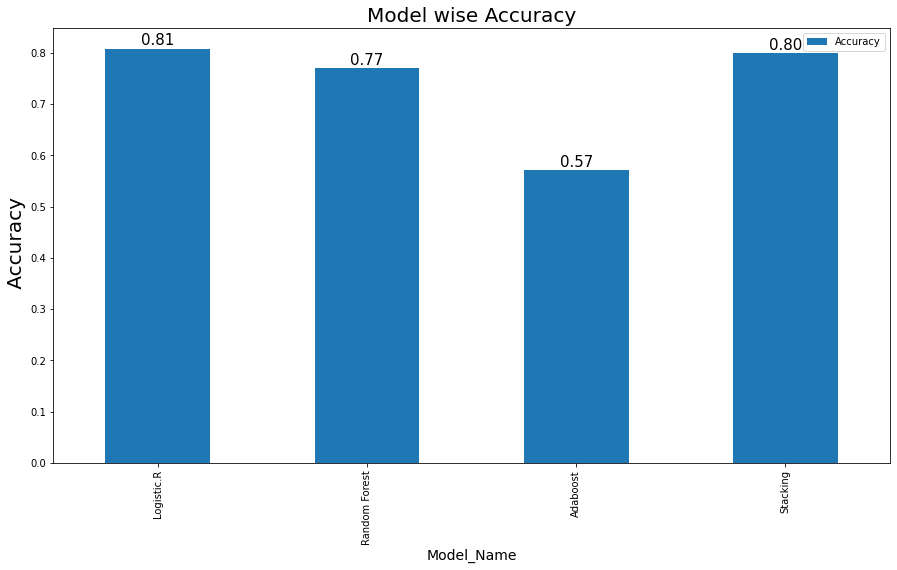

In [186]:
# plotting model performance for comparison 

fig,ax1= plt.subplots(1,1,figsize=(15,8)) 
x2=models.plot(x="Model_Name", y=["Accuracy"], kind="bar",ax=ax1)

plot_s(x2,"Model_Name"," Accuracy","Model wise Accuracy")

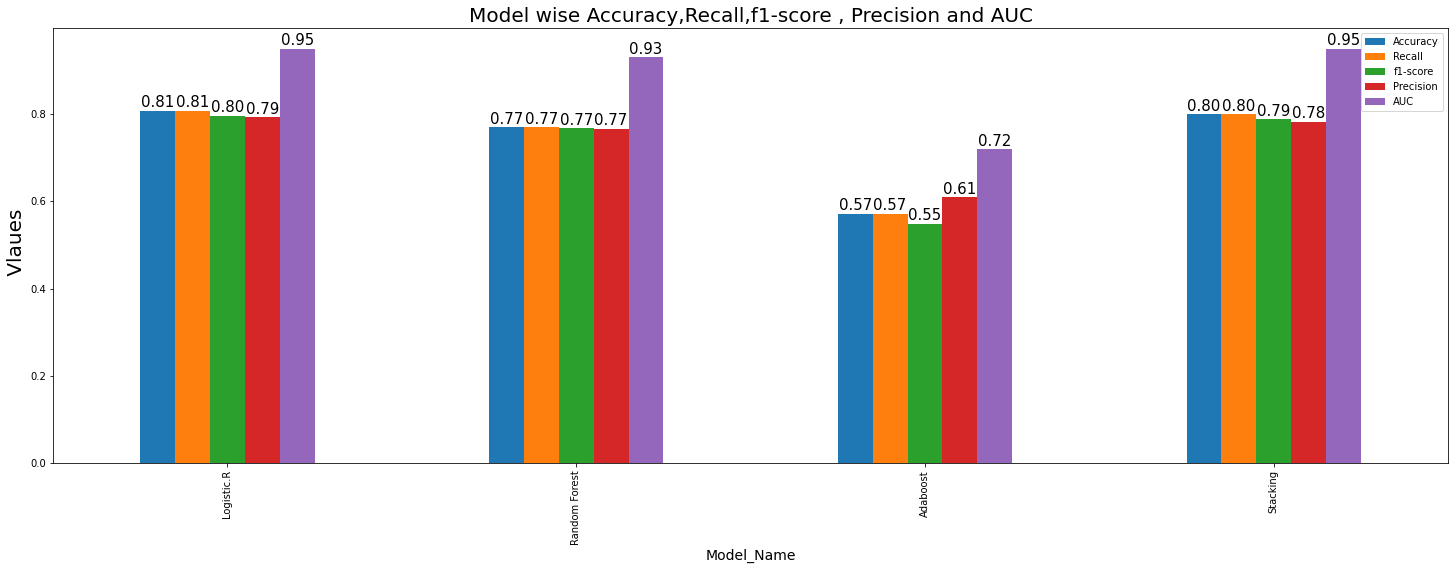

In [248]:
# plotting model performance for comparison 

fig,ax1= plt.subplots(1,1,figsize=(25,8)) 
x2=models.plot(x="Model_Name", y=["Accuracy","Recall","f1-score","Precision","AUC"], kind="bar",ax=ax1)

plot_s(x2,"Model_Name"," Vlaues","Model wise Accuracy,Recall,f1-score , Precision and AUC")

In [195]:
# predectiion on the set

Model["Actual"] = y_test.values
Model.head()

,Predicted_Logistic.R,Predicted_Random.Forest,Predicted_Adaboost,Predicted_Stacking,Actual
0,0,0,1,0,0
1,3,3,3,3,3
2,3,4,4,3,3
3,2,2,2,2,2
4,3,3,3,3,2


In [197]:
# Model.drop("Actual",axis=1,inplace=True)

In [198]:
# chanding the index of the rows

start = len(train_df)
stop =len(train_df)+len(test_df)
ind = np.arange(start,stop)
Model.set_index(ind,inplace =True)

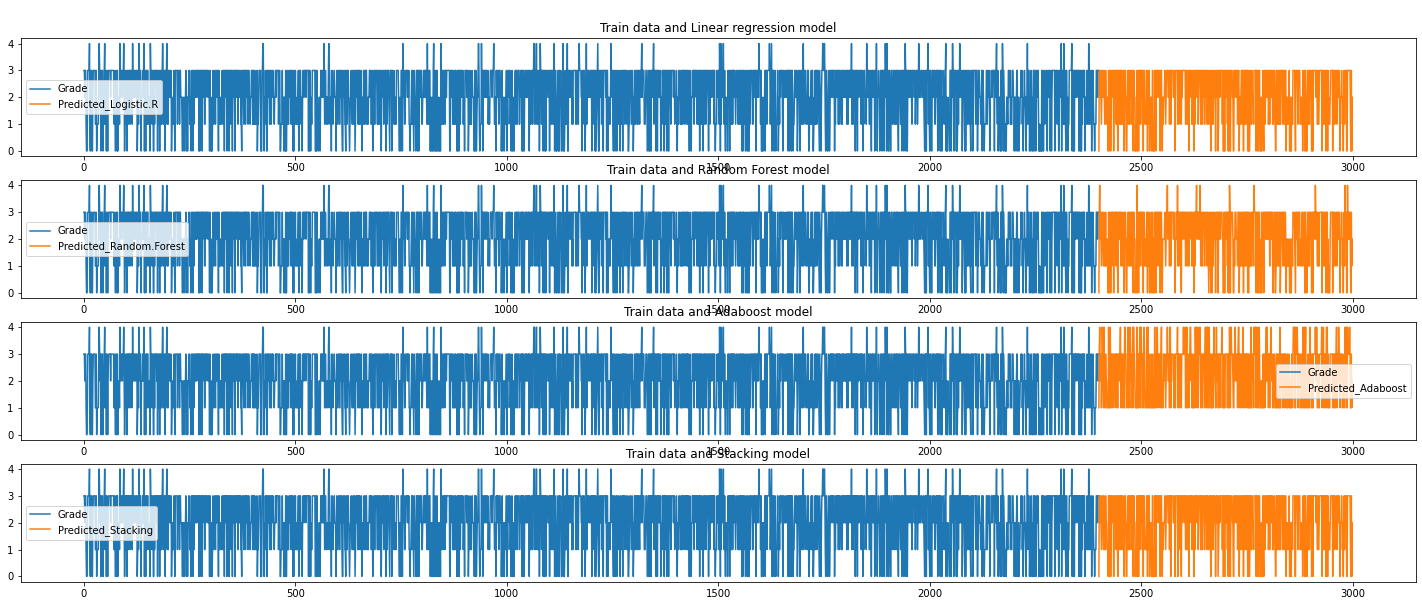

In [202]:
# plotting the actual - predicted error
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(25,10))

y_train["Grade"].plot(legend=True,ax=ax1)
Model["Predicted_Logistic.R"].plot(ax=ax1,legend=True)
ax1.set_title("\nTrain data and Linear regression model")

y_train["Grade"].plot(legend=True,ax=ax2)
Model["Predicted_Random.Forest"].plot(ax=ax2,legend=True)
ax2.set_title("\nTrain data and Random Forest model")

y_train["Grade"].plot(legend=True,ax=ax3)
Model["Predicted_Adaboost"].plot(ax=ax3,legend=True)
ax3.set_title("\nTrain data and Adaboost model")

y_train["Grade"].plot(legend=True,ax=ax4)
Model["Predicted_Stacking"].plot(ax=ax4,legend=True)
ax4.set_title("\nTrain data and Stacking model")

plt.show()

In [203]:
df2=Model.sample(20,random_state = 1)

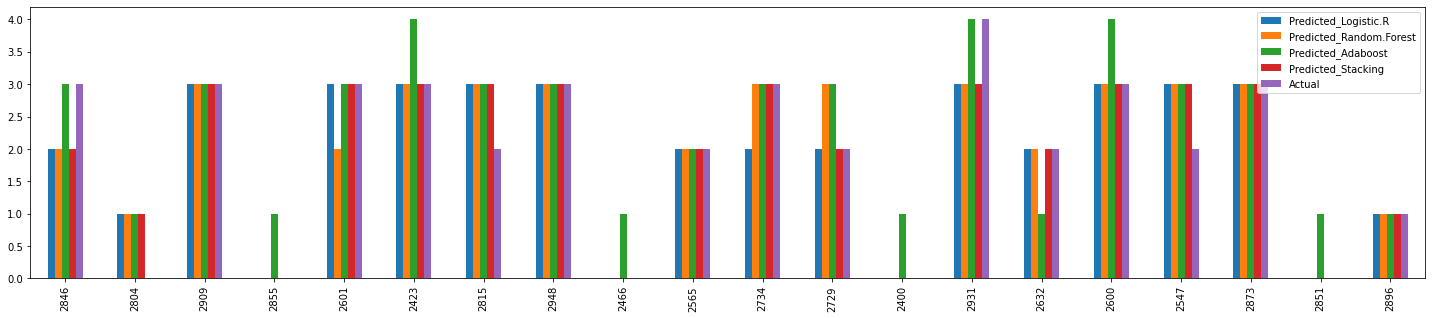

In [206]:
fig,ax1 = plt.subplots(1,1,figsize=(25,5))
df2.plot(kind="bar",ax=ax1)
plt.show()

#### In most of the cases actual values is equal to predicted for linear regression model.

#### Conclusion
From the graphs we can see that Logistic regression gives us best result with High Accuracy,Recall,f1-score and Precision value .In stacking and logistic regression ew get same AUC values but in other values (Accuracy,Recall,f1-score and Precision) logistic is higher than Stackig. So , Logistic regression is the best model to predict the grade of the houses in future .

Predict values and actual values

In [210]:
# list for actual values
n=[]
for i in Model["Actual"]:
  if i == 0:
    k="A"
    n.append(k)
  elif i == 1:
    k="B"
    n.append(k)
  elif i == 2:
    k="C"
    n.append(k)
  elif i == 3:
    k="D"
    n.append(k)
  else :
    K="E"
    n.append(k)

In [207]:
# list for predicted values
m=[]
for i in Model["Predicted_Logistic.R"]:
  if i == 0:
    k="A"
    m.append(k)
  elif i == 1:
    k="B"
    m.append(k)
  elif i == 2:
    k="C"
    m.append(k)
  elif i == 3:
    k="D"
    m.append(k)
  else :
    K="E"
    m.append(k)

In [214]:
# creating dataframe for final model and the actual values
final_model = pd.DataFrame({"Actual":n,"Predict_logistic":m},index = Model.index)

In [215]:
# first 5 predicted and actual values 
final_model.head()

,Actual,Predict_logistic
2400,A,A
2401,D,D
2402,D,D
2403,C,C
2404,C,D
